In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import pandas as pd
import cmath as cm

In [2]:
#Sumulation params
P=40;                         #number of test
N=400;                        #number of tones
M=200;                        #number of periods
fmin=4e9;                     #min freq
fmax=8e9;                     #max freq
fs=22e9;                      #Sample freq
t=np.arange(0,M/fmin,1/fs);   #time
f=np.arange(fmin,fmax,(fmax-fmin)/N);     #frequency vector

In [31]:
#Crest Factors N tones with Uniform distribited phases [-pi,pi]

ph=np.random.uniform(-np.pi,np.pi,N);
Amax=0;
for k in range (P):
    xu=np.zeros(len(t))
    for i in range(N):
        xu+=np.sin(2*np.pi*f[i]*t+ph[i])
    Amax=Amax+np.max(xu)/P

CFu=Amax/np.sqrt(N/2)
CFestu=Amax/np.sqrt(np.mean(xu*xu))
   
print("CFu=%3.3f" %CFu,"CFestu=%3.3f" %CFestu)

CFu=2.906 CFestu=2.909


In [33]:
#Crest Factors N tones with normal distribited phases [-pi,pi]

ph=(np.pi)*np.random.randn(N);
Amax=0;

for k in range (P):
    xn=np.zeros(len(t))
    for i in range(N):
        xn+=np.sin(2*np.pi*f[i]*t+ph[i])
    Amax=Amax+np.max(xn)/P

CFn=Amax/np.sqrt(N/2)
CFestn=Amax/np.sqrt(np.mean(xu*xu))

print("CFn=%3.3f" %CFn,"CFestn=%3.3f" %CFestn)

50.64314258824367
CFn=3.581 CFestn=3.584


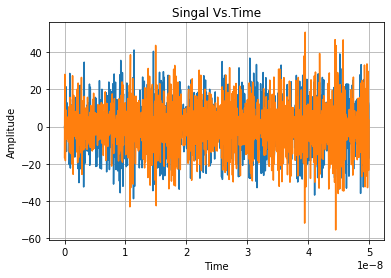

In [34]:
#Ploting Frequency Vs. Time

fig, ax = plt.subplots()
ax.plot(t,xu,t,xn)

ax.set(xlabel='Time', ylabel='Amplitude',
       title='Singal Vs.Time')
ax.grid()

fig.savefig("N tones with Random Phases.pdf")
plt.show()

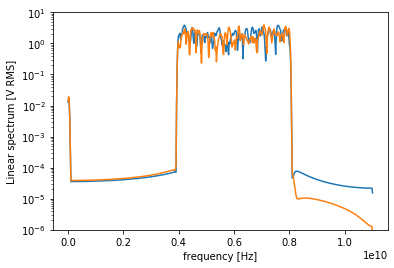

In [345]:
f, Pxx_specu = signal.periodogram(xu, fs, 'flattop', scaling='spectrum')
f, Pxx_specn = signal.periodogram(xn, fs, 'flattop', scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_specu), f, np.sqrt(Pxx_specn))
plt.ylim([1e-6, 1e1])
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()

Proceedings of International Conference on Technology and Social Science 2018 (ICTSS 2018)Study onMulti-tone SignalsforDesign and Testingof Linear Circuits and SystemsYukiko Shibasaki1,a,Koji Asami1,b, Anna Kuwana 1,c,YuanyangDu1,d,Akemi Hatta 1,e,Kazuyoshi Kubo2,fand Haruo Kobayash